In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(11,8)}, font_scale=2)
import sklearn as sk
pd.set_option('display.max_columns', None)


In [2]:
asteroid = pd.read_csv('dataset.csv')

In [8]:
asteroid['pha'] = asteroid['pha'] == 'Y'
asteroid['neo'] = asteroid['neo'] == 'Y'
asteroid.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,False,False,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,False,False,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,False,False,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,False,False,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,False,False,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [9]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958524 non-null  bool   
 7   pha             958524 non-null  bool   
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [4]:
cleaned_data = asteroid.drop(columns=["id", "spkid", "full_name", "pdes", "name", "prefix", "diameter", "albedo", "diameter_sigma",
                                "orbit_id", "equinox","sigma_e","sigma_a","sigma_q","sigma_i","sigma_om","sigma_w","sigma_ma","sigma_ad","sigma_n","sigma_tp","sigma_tp","sigma_per"])

In [6]:
cleaned_data.head()

,neo,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class,rms
0,False,False,3.40,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,MBA,0.43301
1,False,False,4.20,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,MBA,0.35936
2,False,False,5.33,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,MBA,0.33848
3,False,False,3.00,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,MBA,0.39980
4,False,False,6.90,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,MBA,0.52191


In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 23 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        958524 non-null  bool   
 1   pha        958524 non-null  bool   
 2   H          952261 non-null  float64
 3   epoch      958524 non-null  float64
 4   epoch_mjd  958524 non-null  int64  
 5   epoch_cal  958524 non-null  float64
 6   e          958524 non-null  float64
 7   a          958524 non-null  float64
 8   q          958524 non-null  float64
 9   i          958524 non-null  float64
 10  om         958524 non-null  float64
 11  w          958524 non-null  float64
 12  ma         958523 non-null  float64
 13  ad         958520 non-null  float64
 14  n          958524 non-null  float64
 15  tp         958524 non-null  float64
 16  tp_cal     958524 non-null  float64
 17  per        958520 non-null  float64
 18  per_y      958523 non-null  float64
 19  moid       938603 non-n

(array([     0.,      0.,      0.,      0.,      0., 935629.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

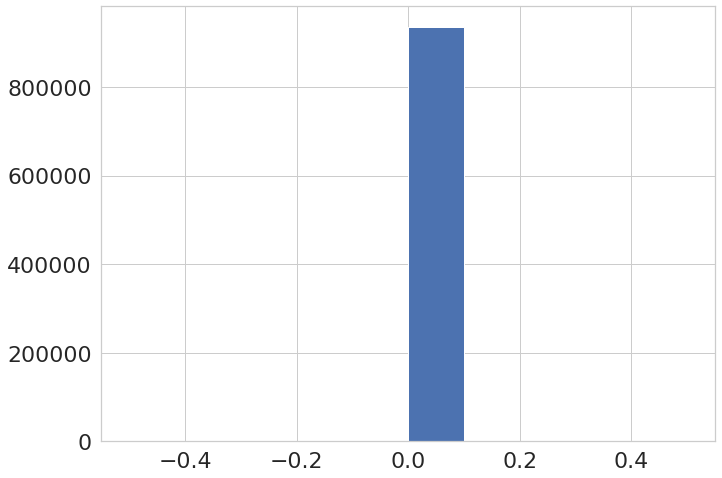

In [17]:
plt.hist(asteroid[asteroid.neo == 0].pha)

(array([41., 39., 32., 26., 23., 13.,  7.,  8.,  8.,  3.]),
 array([0.012 , 0.0686, 0.1252, 0.1818, 0.2384, 0.295 , 0.3516, 0.4082,
        0.4648, 0.5214, 0.578 ]),
 <BarContainer object of 10 artists>)

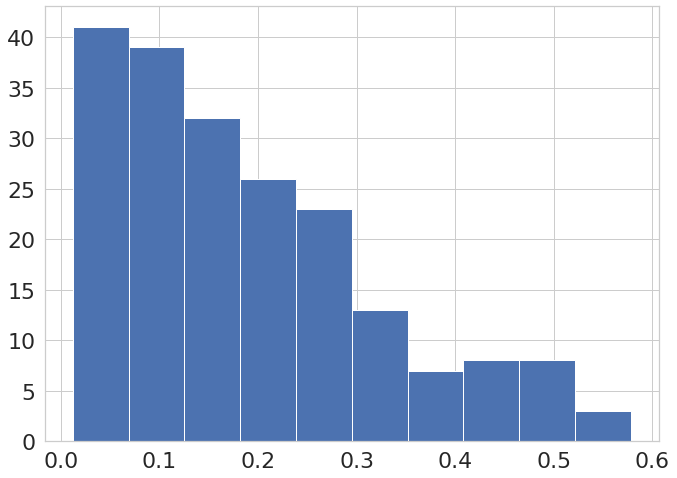

In [24]:
plt.hist(asteroid[asteroid.pha == 1].albedo)

(array([8.0041e+04, 2.3382e+04, 1.8724e+04, 9.4630e+03, 2.4040e+03,
        4.9600e+02, 1.7900e+02, 8.6000e+01, 6.3000e+01, 6.5000e+01]),
 array([0.001 , 0.1009, 0.2008, 0.3007, 0.4006, 0.5005, 0.6004, 0.7003,
        0.8002, 0.9001, 1.    ]),
 <BarContainer object of 10 artists>)

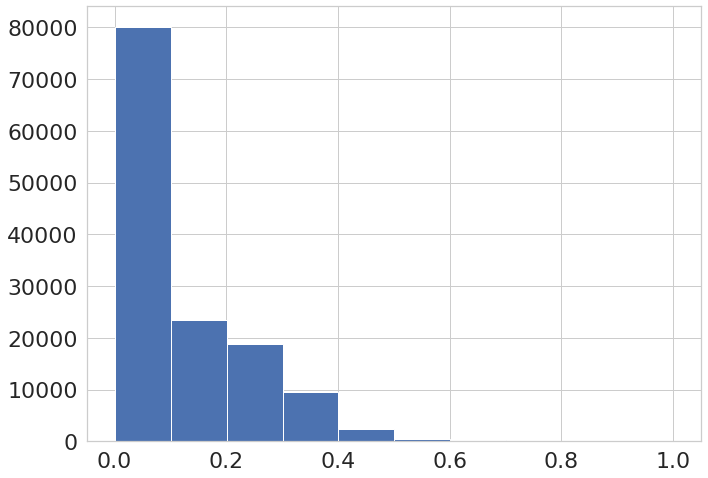

In [25]:
plt.hist(asteroid[asteroid.pha == 0].albedo)